In [1]:
#Import all the packages that will be using in this project

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler


In [2]:
#Import the ride dataset

rides = pd.read_csv('/Users/winniezhang/Desktop/uber_lyft_dataset/cab_rides.csv')

In [3]:
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
#Import the weather dataset

weather = pd.read_csv('/Users/winniezhang/Desktop/uber_lyft_dataset/weather.csv')

In [5]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [6]:
rides.shape

(693071, 10)

In [7]:
rides.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [8]:
#Number of trips in Uber
print('Uber:', rides[rides['cab_type'] == 'Uber'].shape)

#Number of trips in Lyft
print('Lyft:', rides[rides['cab_type']=='Lyft'].shape)

Uber: (385663, 10)
Lyft: (307408, 10)


In [9]:
#Convert time_stamp in rides to human readable version
rides['Date_Time'] = pd.to_datetime(rides['time_stamp'], unit='ms')
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,Date_Time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223


In [10]:
# Create new columns Date and Hour_of_day for better analysis later
rides['Date'] = rides['Date_Time'].dt.date
rides['Hour_of_day'] = rides['Date_Time'].dt.hour
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,Date_Time,Date,Hour_of_day
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890,2018-12-16,9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677,2018-11-27,2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198,2018-11-28,1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749,2018-11-30,4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223,2018-11-29,3


In [11]:
#Convert time_stamp in weather to human readable version
weather['Date_Time'] = pd.to_datetime(weather['time_stamp'], unit='s')
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,Date_Time
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01


In [12]:
weather['Date']=weather['Date_Time'].dt.date
weather['Hour_of_day']=weather['Date_Time'].dt.hour
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,Date_Time,Date,Hour_of_day
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,2018-12-16,23
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,2018-12-16,23
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,2018-12-16,23
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,2018-12-16,23
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,2018-12-16,23


In [13]:
rides['product_id'].value_counts()

product_id
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: count, dtype: int64

In [14]:
rides['name'].value_counts()

name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

the columns 'product_id' and 'name' are describing the same thing, will drop one of the columns later.

In [15]:
rides['id'].value_counts()

id
424553bb-7174-41ea-aeb4-fe06d4f4b9d7    1
86557077-556d-4cc0-8acf-4d618d5c0a8d    1
fa75d4b4-52c8-4e65-a5e6-335c8268c968    1
2d051bf0-4e5e-4b18-a931-ea15c4fb9066    1
7339fbe3-b0bb-4bac-a037-b1dc2ab0feac    1
                                       ..
0281be2d-1573-47a5-868d-fef6100d1b77    1
33827bd1-5164-4579-b567-14e85220c99b    1
6c736bfe-40d0-47b9-be59-ef41d9df516b    1
7311da4b-0932-4572-97ee-242a9e5f0229    1
e7fdc087-fe86-40a5-a3c3-3b2a8badcbda    1
Name: count, Length: 693071, dtype: int64

the column 'id' is just an id assigned to each row (each trip), will drop column also.

In [16]:
rides['surge_multiplier'].value_counts()

surge_multiplier
1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

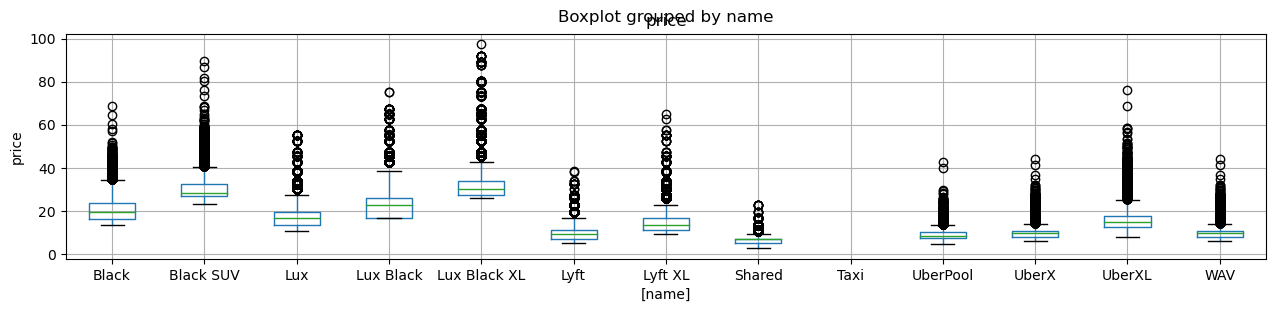

In [17]:
rides[['price','name']].boxplot(by='name',figsize=(15,3))
plt.ylabel('price')
plt.show()

In [18]:
rides[rides['name'] == 'Taxi'].count()

distance            55095
cab_type            55095
time_stamp          55095
destination         55095
source              55095
price                   0
surge_multiplier    55095
id                  55095
product_id          55095
name                55095
Date_Time           55095
Date                55095
Hour_of_day         55095
dtype: int64

When 'name' = 'Taxi', the price tends to be empty. We will drop rows with 'Taxi'.

In [19]:
rides = rides.dropna()

In [20]:
rides[rides['name'] == 'Taxi'].count()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
Date_Time           0
Date                0
Hour_of_day         0
dtype: int64

In [21]:
#Drop the columns mentioned above, also drop time_stamp and Date_Time because we have converted it into Date and Hour of Day
rides = rides.drop(columns=['time_stamp', 'id', 'product_id', 'Date_Time'])
rides.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,Date,Hour_of_day
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,9
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27,2
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28,1
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29,3


In [22]:
#Group the weather by location, date, and hour of day, find the mean for each feature
weather_ = weather.groupby(['location', 'Date','Hour_of_day']).mean()
weather_.head()

temp    clouds     pressure  rain  \
location Date       Hour_of_day                                           
Back Bay 2018-11-26 3            41.040000  0.870000  1014.390000   NaN   
                    4            40.658000  0.894000  1014.008000   NaN   
                    5            40.561250  0.930000  1013.821250   NaN   
                    6            40.627333  0.990667  1014.196667   NaN   
                    7            41.137500  0.970000  1014.292500   NaN   

                                   time_stamp  humidity      wind  \
location Date       Hour_of_day                                     
Back Bay 2018-11-26 3            1.543204e+09  0.920000  1.460000   
                    4            1.543208e+09  0.926000  2.646000   
                    5            1.543210e+09  0.921250  2.496250   
                    6            1.543214e+09  0.913333  1.350667   
                    7            1.543217e+09  0.920000  1.735000   

                                                    Date_Time  
location Date       Hour_of_day                                
Back Bay 2018-11-26 3           2018-11-26 03:40:45.000000000  
                    4           2018-11-26 04:46:13.600000000  
                    5           2018-11-26 05:23:56.750000128  
                    6           2018-11-26 06:25:16.466666752  
                    7           2018-11-26 07:28:12.750000128

I have also dropped time_stamp and Date_Time columns in the weather_ table.

In [23]:
weather_ = weather_.drop(columns=['time_stamp', 'Date_Time'])

In [24]:
#Merge two tables together, rides left join weather on source location, Date, and Hour_of_day 
ride_weather = pd.merge(rides, weather_,  how='left', left_on=['source','Date', 'Hour_of_day'], right_on = ['location','Date', 'Hour_of_day'])

In [25]:
ride_weather.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,Date,Hour_of_day,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,9,38.460,0.290000,1022.25,NaN,0.760000,7.68
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27,2,44.065,0.995000,1002.88,0.106,0.895000,12.63
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30,4,35.080,0.000000,1013.71,NaN,0.700000,5.25
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29,3,37.680,0.433333,998.42,NaN,0.706667,11.16


In [26]:
print('data dimensions:',ride_weather.shape)
perc_missing_per_ftr = ride_weather.isnull().sum(axis=0)/rides.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

data dimensions: (637976, 15)
fraction of missing values in features:
temp        0.004285
clouds      0.004285
pressure    0.004285
rain        0.828909
humidity    0.004285
wind        0.004285
dtype: float64


Some Distribution Plot

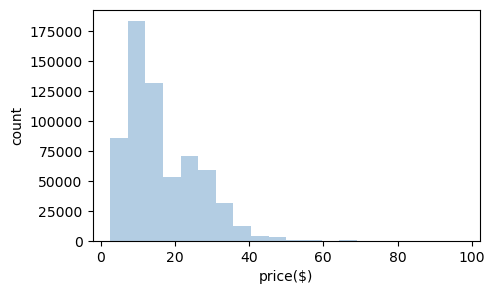

In [27]:
plt.figure(figsize=(5,3))
ride_weather['price'].plot.hist(bins = 20, color = '#B3CDE3')              
plt.xlabel('price($)')
plt.ylabel('count')
plt.show()

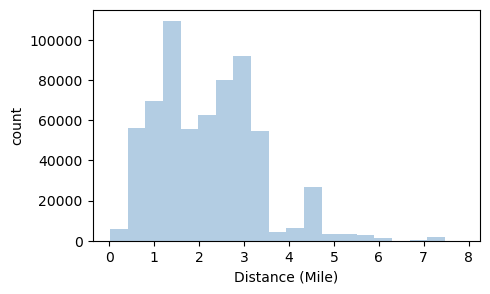

In [28]:
plt.figure(figsize=(5,3))
ride_weather['distance'].plot.hist(bins = 20, color = '#B3CDE3')            
plt.xlabel('Distance (Mile)')
plt.ylabel('count')
plt.show()

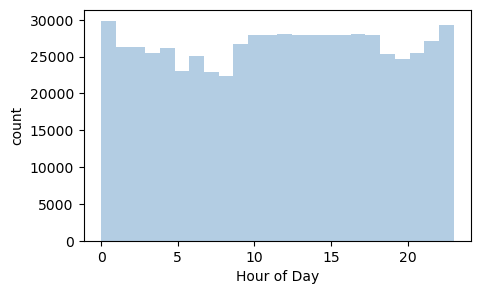

In [29]:
plt.figure(figsize=(5,3))
ride_weather['Hour_of_day'].plot.hist(bins = 24, color = '#B3CDE3')              
plt.xlabel('Hour of Day')
plt.ylabel('count')
plt.show()

In [30]:
ride_weather['Hour_of_day'].value_counts()

Hour_of_day
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: count, dtype: int64

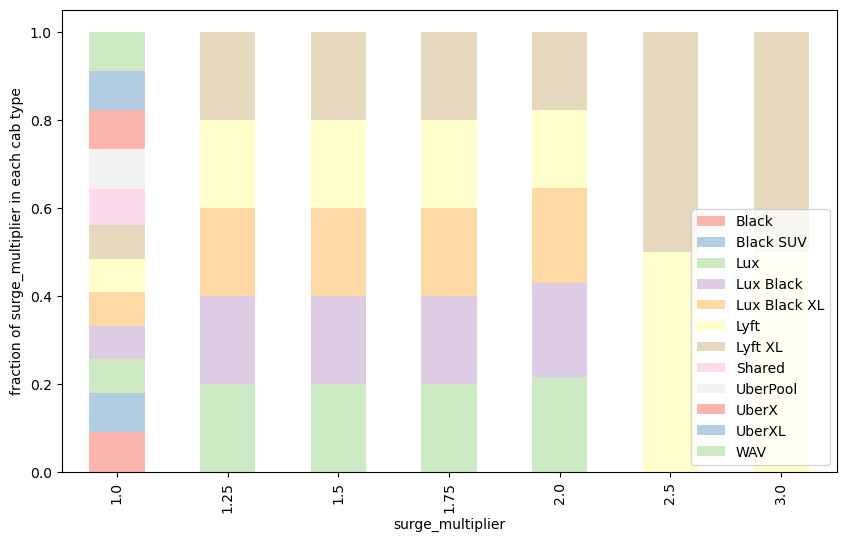

In [31]:
custom_palette = ['#FBB4AE','#B3CDE3','#CCEBC5','#DECBE4','#FED9A6','#FFFFCC','#E5D8BD','#FDDAEC','#F2F2F2']
sns.set_palette(custom_palette)
count_matrix = ride_weather.groupby(['surge_multiplier', 'name']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(10,6))
plt.ylabel('fraction of surge_multiplier in each cab type')
plt.legend(loc=4)
plt.show()

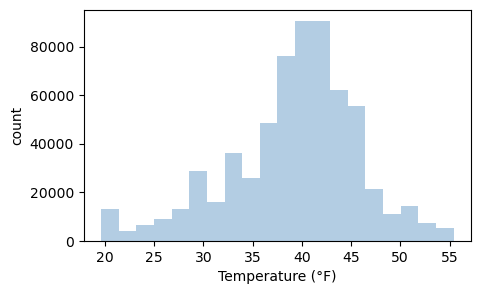

In [32]:
plt.figure(figsize=(5,3))
ride_weather['temp'].plot.hist(bins = 20, color = '#B3CDE3')             
plt.xlabel('Temperature (°F)')
plt.ylabel('count')
plt.show()

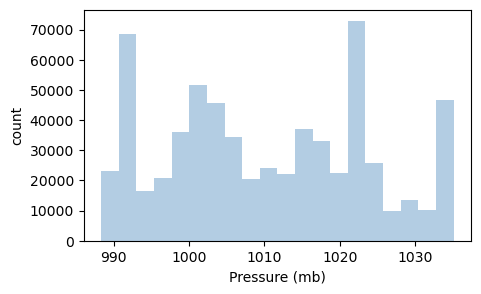

In [33]:
plt.figure(figsize=(5,3))
ride_weather['pressure'].plot.hist(bins = 20, color = '#B3CDE3')             
plt.xlabel('Pressure (mb)')
plt.ylabel('count')
plt.show()

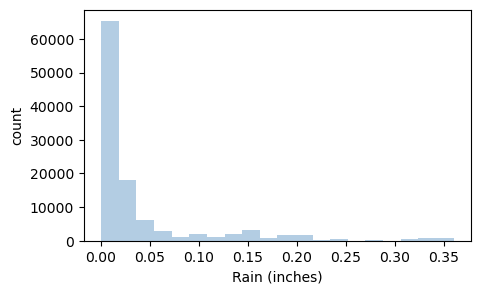

In [34]:
plt.figure(figsize=(5,3))
ride_weather['rain'].plot.hist(bins = 20, color = '#B3CDE3')             
plt.xlabel('Rain (inches)')
plt.ylabel('count')
plt.show()

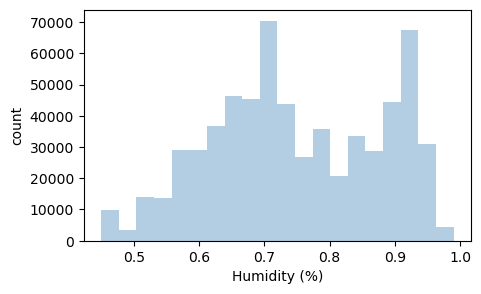

In [35]:
plt.figure(figsize=(5,3))
ride_weather['humidity'].plot.hist(bins = 20, color = '#B3CDE3')             
plt.xlabel('Humidity (%)')
plt.ylabel('count')
plt.show()

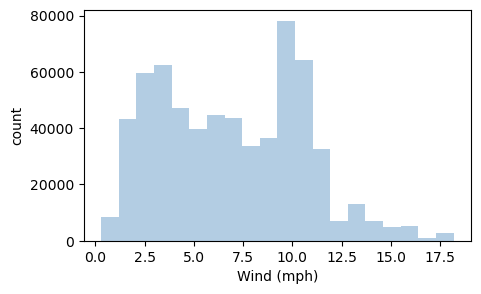

In [36]:
plt.figure(figsize=(5,3))
ride_weather['wind'].plot.hist(bins = 20, color = '#B3CDE3')             
plt.xlabel('Wind (mph)')
plt.ylabel('count')
plt.show()

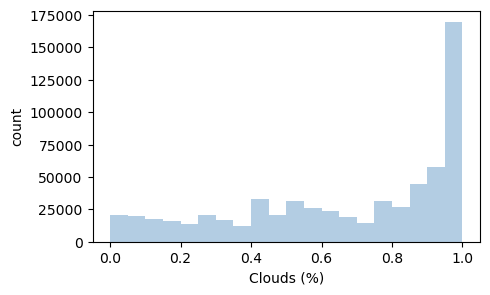

In [37]:
plt.figure(figsize=(5,3))
ride_weather['clouds'].plot.hist(bins = 20, color = '#B3CDE3')             
plt.xlabel('Clouds (%)')
plt.ylabel('count')
plt.show()

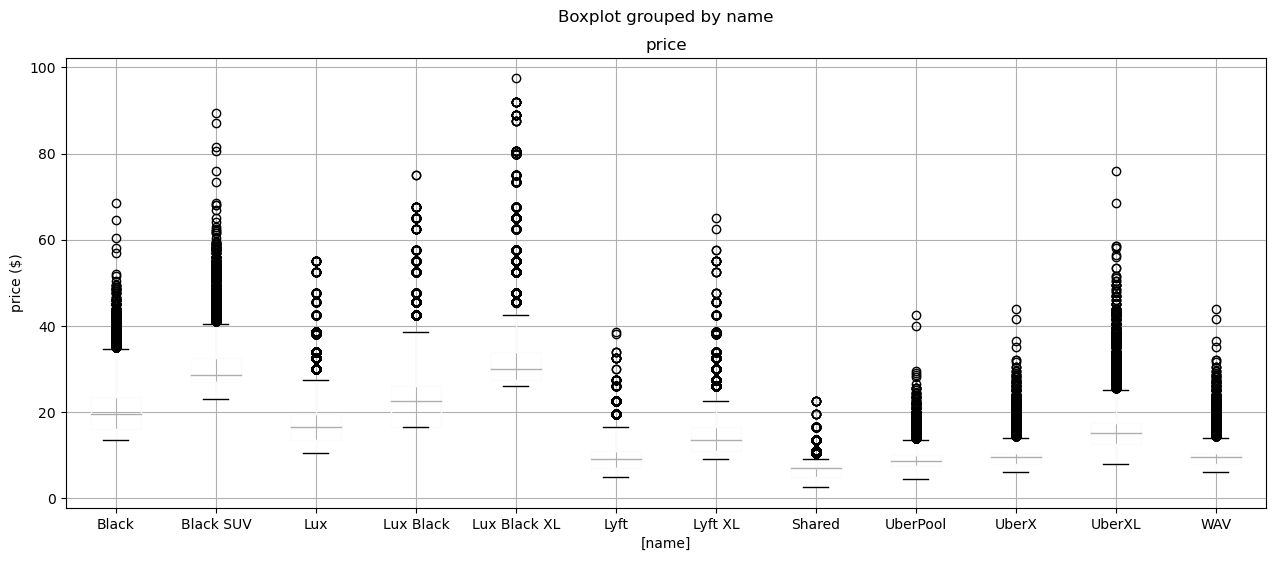

In [38]:
ride_weather[['price','name']].boxplot(by='name',figsize=(15,6))
plt.ylabel('price ($)')
plt.show()

I want to look at tables of Uber of Lyft seperately.

In [39]:
uber = rides[rides['cab_type'] == 'Uber']

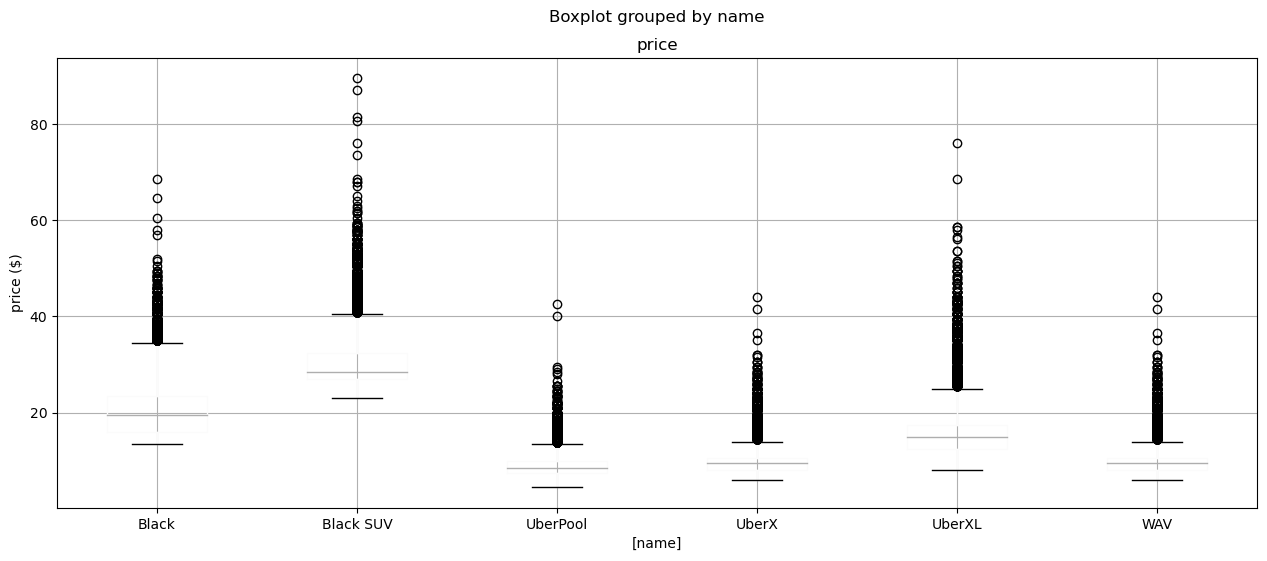

In [40]:
uber[['price','name']].boxplot(by='name',figsize=(15,6))
plt.ylabel('price ($)')
plt.show()

In [41]:
lyft = rides[rides['cab_type'] == 'Lyft']

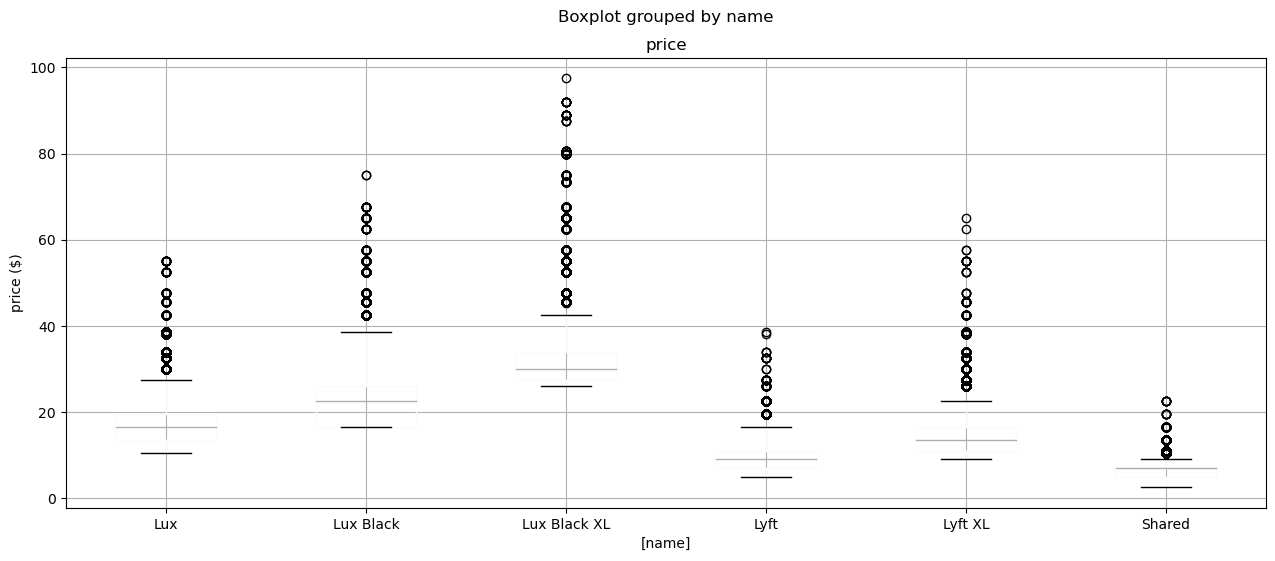

In [42]:
lyft[['price','name']].boxplot(by='name', figsize=(15,6))
plt.ylabel('price ($)')
plt.show()

Since uber and lyft have similar 'name' feature, such that they make similar ride type different names. I will make the similar ride types the same name. For example, uberpool and shared will all be shared. Lyft and Uberx will change to standard...

In [43]:
ride_weather = ride_weather.replace('UberPool', 'Shared')
ride_weather = ride_weather.replace('Lyft XL', 'XL')
ride_weather = ride_weather.replace('UberXL', 'XL')
ride_weather = ride_weather.replace('UberX', 'Standard')
ride_weather['name'] = ride_weather['name'].replace('Lyft', 'Standard')
ride_weather = ride_weather.replace('WAV', 'Standard')
#premium black car service in luxury vehicles
ride_weather = ride_weather.replace('Lux Black XL', 'Lux/Black XL')
ride_weather = ride_weather.replace('Black SUV', 'Lux/Black XL')
ride_weather = ride_weather.replace('Lux', 'Lux/Black')
ride_weather = ride_weather.replace('Black', 'Lux/Black')

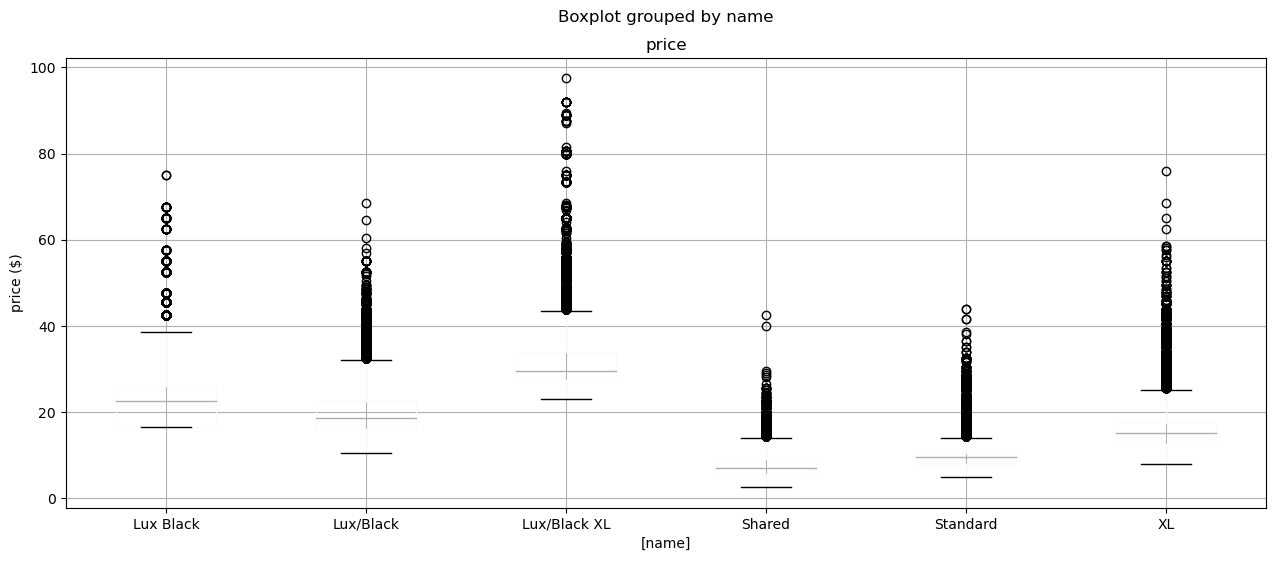

In [44]:
ride_weather[['price','name']].boxplot(by='name',figsize=(15,6))
plt.ylabel('price ($)')
plt.show()

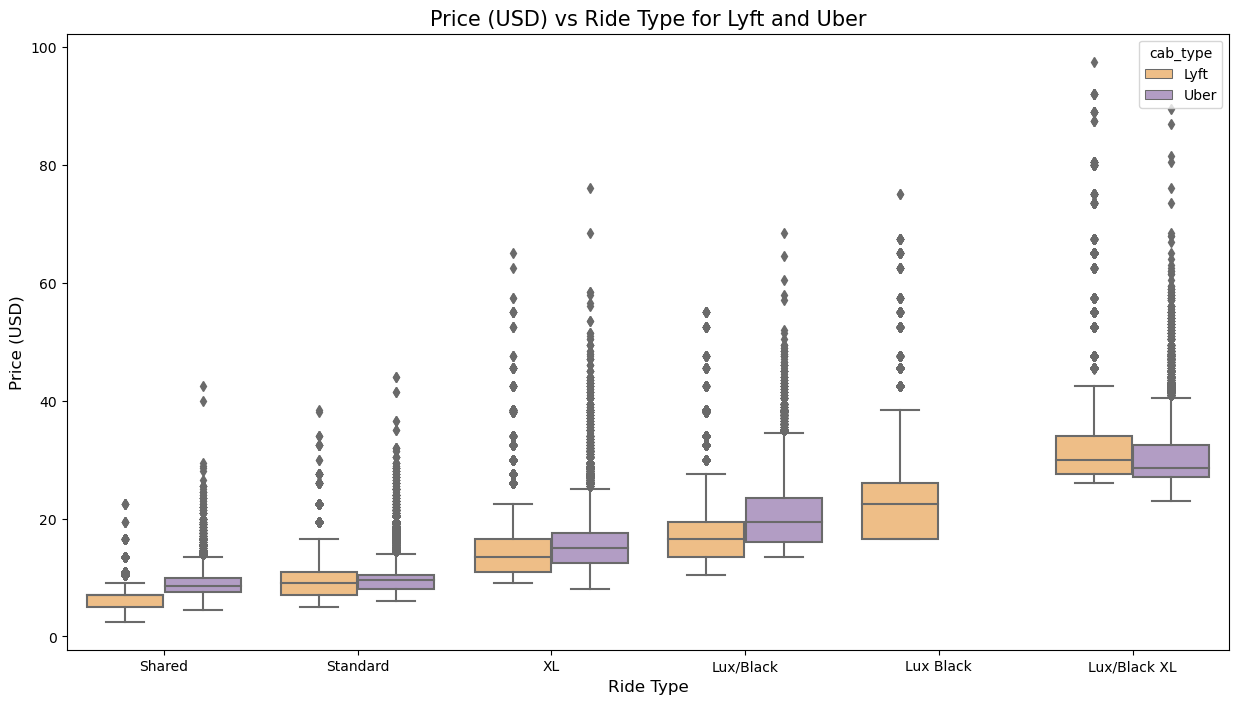

In [45]:
sns.set_palette(['#FFBF76', '#B396CB'])
fig, ax = plt.subplots(figsize=(15, 8))
plot1 = sns.boxplot(data = ride_weather, x="name", y="price", hue="cab_type", ax = ax, 
            order = ['Shared', 'Standard', 'XL', 'Lux/Black', 'Lux Black', 'Lux/Black XL'])

plot1.set_xlabel( "Ride Type" , size = 12) 
plot1.set_ylabel( "Price (USD)" , size = 12) 
plot1.set_title( "Price (USD) vs Ride Type for Lyft and Uber" , size = 15 ) 
#plot1.set(xlabel='Ride Type', ylabel='Price ($)')
plt.show()

<Axes: xlabel='rain', ylabel='price'>

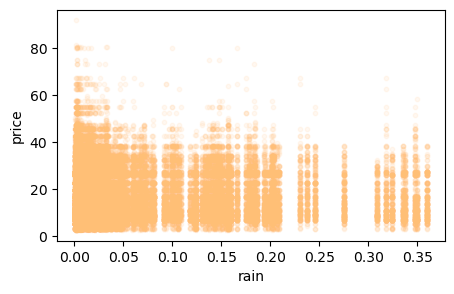

In [46]:
ride_weather.plot.scatter('rain','price',figsize=(5,3),alpha=0.1,s=10)

<Axes: xlabel='surge_multiplier', ylabel='price'>

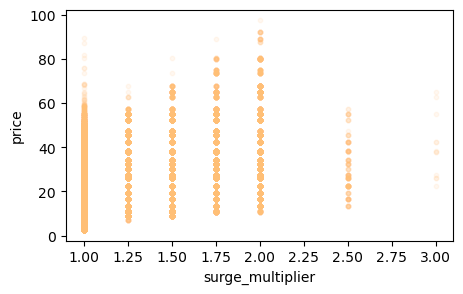

In [47]:
ride_weather.plot.scatter('surge_multiplier','price',figsize=(5,3),alpha=0.1,s=10)

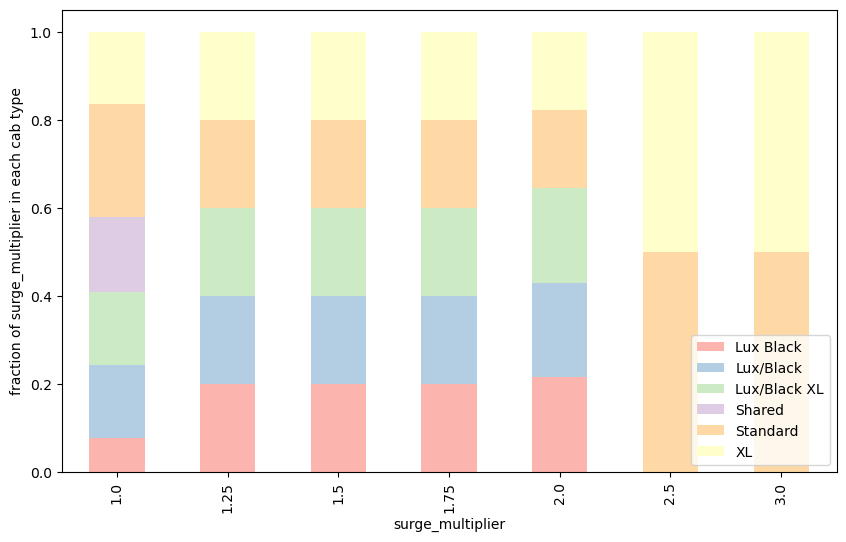

In [48]:
custom_palette = ['#FBB4AE','#B3CDE3','#CCEBC5','#DECBE4','#FED9A6','#FFFFCC','#E5D8BD','#FDDAEC','#F2F2F2']
sns.set_palette(custom_palette)
count_matrix = ride_weather.groupby(['surge_multiplier', 'name']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(10,6))
plt.ylabel('fraction of surge_multiplier in each cab type')
plt.legend(loc=4)
plt.show()

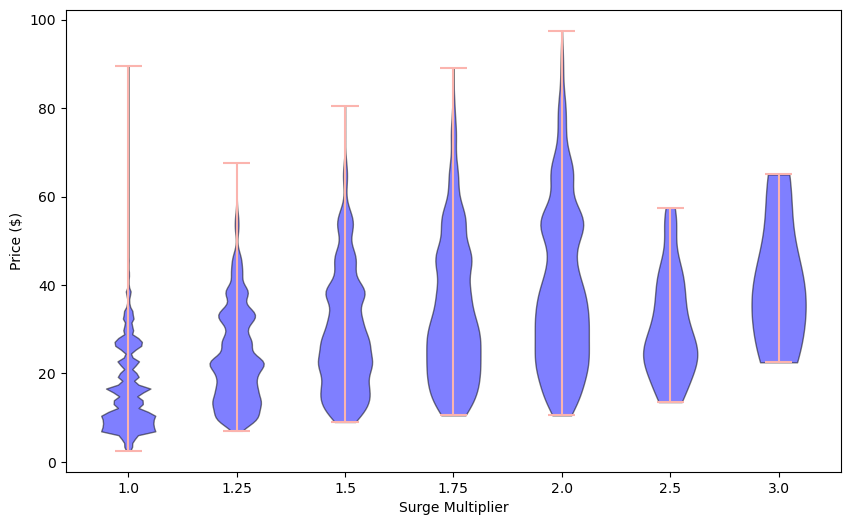

In [49]:
dataset = [ride_weather[ride_weather['surge_multiplier']== 1.0]['price'].values,
           ride_weather[ride_weather['surge_multiplier']== 1.25]['price'].values,
           ride_weather[ride_weather['surge_multiplier']== 1.5]['price'].values,
           ride_weather[ride_weather['surge_multiplier']== 1.75]['price'].values,
           ride_weather[ride_weather['surge_multiplier']== 2.0]['price'].values,
           ride_weather[ride_weather['surge_multiplier']== 2.5]['price'].values,
           ride_weather[ride_weather['surge_multiplier']== 3.0]['price'].values]

plt.figure(figsize=(10,6))

violin = plt.violinplot(dataset = dataset)
for pc in violin["bodies"]:
    pc.set_facecolor("blue")
    pc.set_edgecolor("black")
    pc.set_alpha(0.5)
plt.xticks([1,2, 3, 4, 5, 6, 7],['1.0','1.25', '1.5', '1.75', '2.0', '2.5', '3.0'])
plt.xlabel('Surge Multiplier')
plt.ylabel('Price ($)')
plt.show()

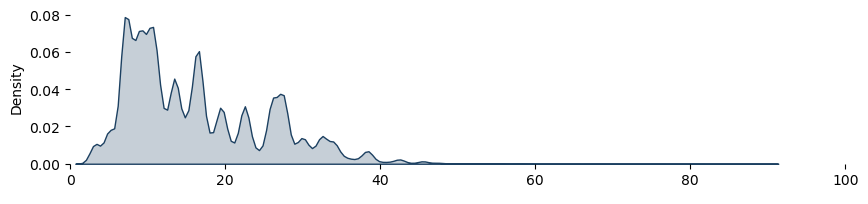

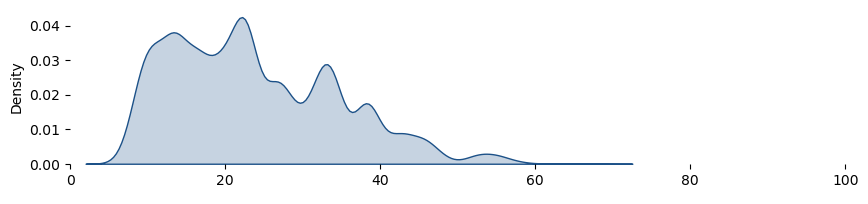

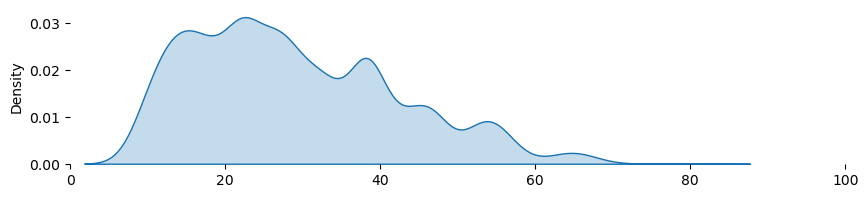

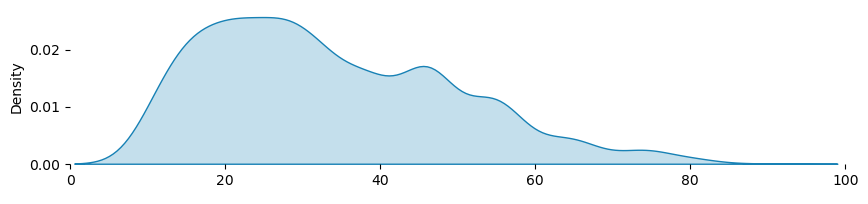

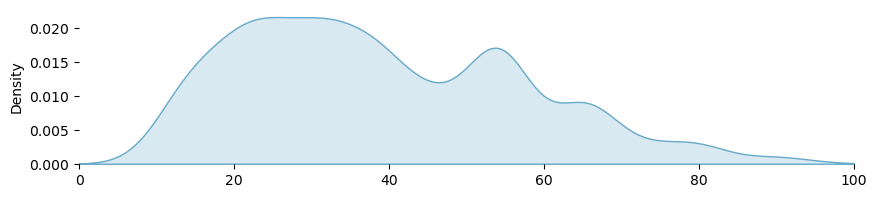

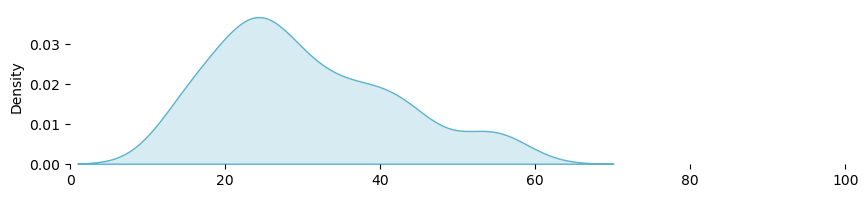

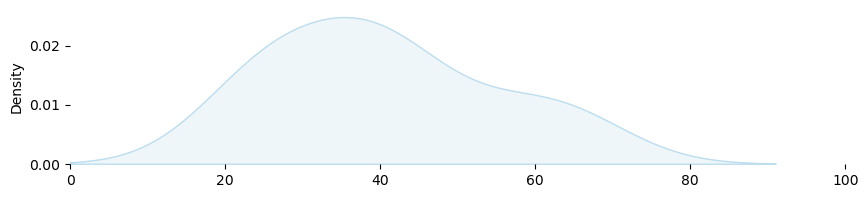

In [50]:
custom_palette = ['#1c4061', '#1c5188', '#1772B4','#1781B5','#66A9C9','#5CB3CC','#BCDDED','#CBE7D7','#A5D6D0','#69A794','#3EA894']
i = 0
for surge_multiplier, data in ride_weather.groupby('surge_multiplier'):
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.set_xlim(0,100)
    ax.set_xlabel( " " , size = 1 ) 
    sns.despine(bottom = True, left = True)
    sns.kdeplot(data['price'], ax=ax, fill = 'true', label = surge_multiplier, color = custom_palette[i])
    i += 1

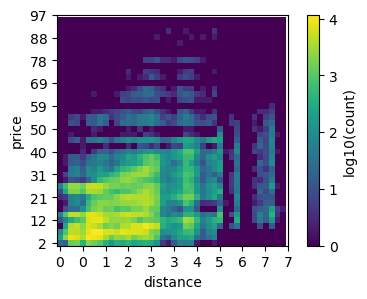

In [52]:
nbins = 40

heatmap, xedges, yedges = np.histogram2d(ride_weather['distance'], ride_weather['price'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(5,3))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('distance')
plt.ylabel('price')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [53]:
ride_weather['Date'].value_counts()

Date
2018-11-27    70135
2018-11-28    67842
2018-11-29    55222
2018-12-01    41680
2018-11-30    41544
2018-12-16    41359
2018-12-17    41354
2018-12-14    41344
2018-12-15    41332
2018-12-03    41323
2018-12-02    41298
2018-12-13    35496
2018-12-18    33329
2018-11-26    29028
2018-12-04    11627
2018-12-10     2534
2018-12-09     1529
Name: count, dtype: int64

In [54]:
ride_weather['Date'] = pd.to_datetime(ride_weather['Date'], format='%Y-%m-%d')

In [55]:
#Add a new column day of week to find new insights
ride_weather['day_of_week'] = ride_weather['Date'].dt.dayofweek

In [56]:
ride_weather.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,Date,Hour_of_day,temp,clouds,pressure,rain,humidity,wind,day_of_week
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,9,38.460,0.290000,1022.25,NaN,0.760000,7.68,6
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux/Black,2018-11-27,2,44.065,0.995000,1002.88,0.106,0.895000,12.63,1
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Standard,2018-11-28,1,NaN,NaN,NaN,NaN,NaN,NaN,2
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux/Black XL,2018-11-30,4,35.080,0.000000,1013.71,NaN,0.700000,5.25,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,XL,2018-11-29,3,37.680,0.433333,998.42,NaN,0.706667,11.16,3


In [57]:
ride_weather['day_of_week'] = ride_weather['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [58]:
ride_weather.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,Date,Hour_of_day,temp,clouds,pressure,rain,humidity,wind,day_of_week
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,9,38.460,0.290000,1022.25,NaN,0.760000,7.68,Sunday
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux/Black,2018-11-27,2,44.065,0.995000,1002.88,0.106,0.895000,12.63,Tuesday
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Standard,2018-11-28,1,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux/Black XL,2018-11-30,4,35.080,0.000000,1013.71,NaN,0.700000,5.25,Friday
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,XL,2018-11-29,3,37.680,0.433333,998.42,NaN,0.706667,11.16,Thursday


Text(0, 0.5, 'Frequency')

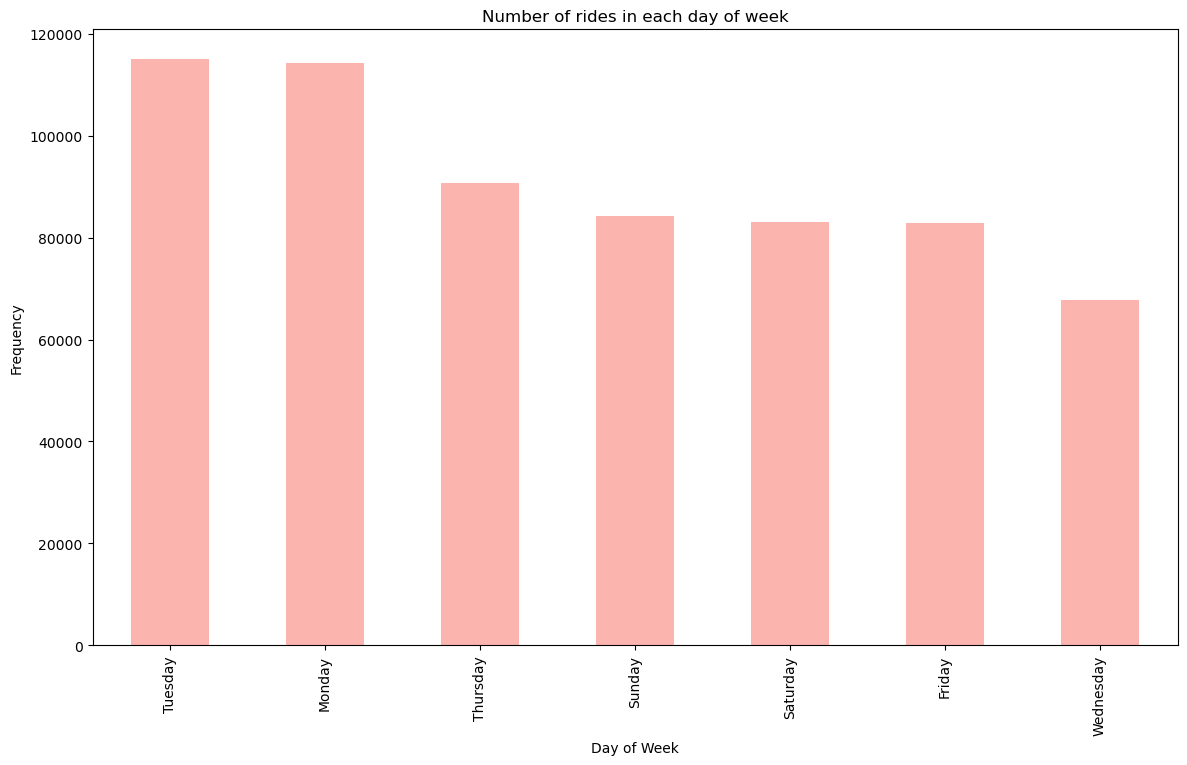

In [59]:
ax = ride_weather['day_of_week'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of rides in each day of week")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Frequency")

In [60]:
ride_weather['destination'].value_counts()

destination
Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: count, dtype: int64

In [61]:
ride_weather['source'].value_counts()

source
Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: count, dtype: int64

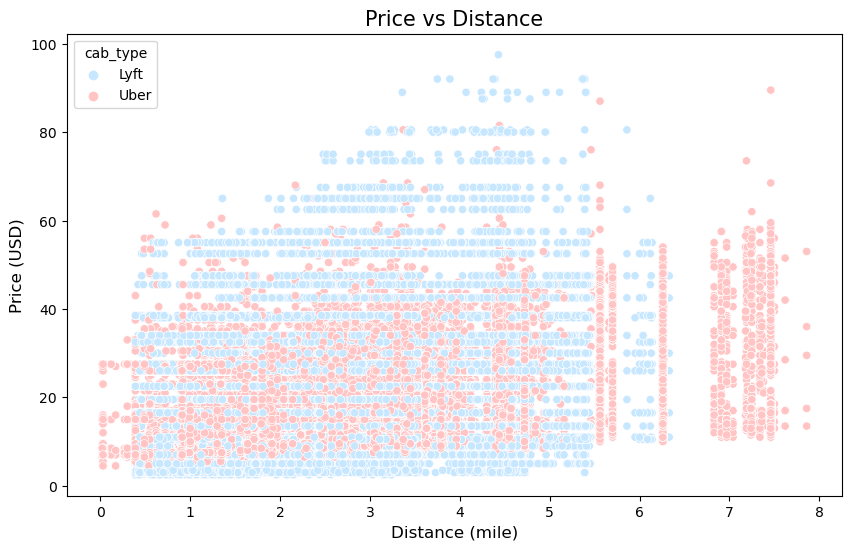

In [62]:
sns.set_palette(['#C7E7FF', '#FFC4C3'])
fig, ax = plt.subplots(figsize = ( 10 , 6 )) 
sns.scatterplot( ax = ax , x = "distance" , y = "price" , data = ride_weather, hue = "cab_type") 
ax.set_xlabel( "Distance (mile)" , size = 12 ) 
ax.set_ylabel( "Price (USD)" , size = 12 ) 
ax.set_title( "Price vs Distance" , size = 15) 
plt.show() 

<Axes: xlabel='distance', ylabel='price'>

/Users/winniezhang/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/winniezhang/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


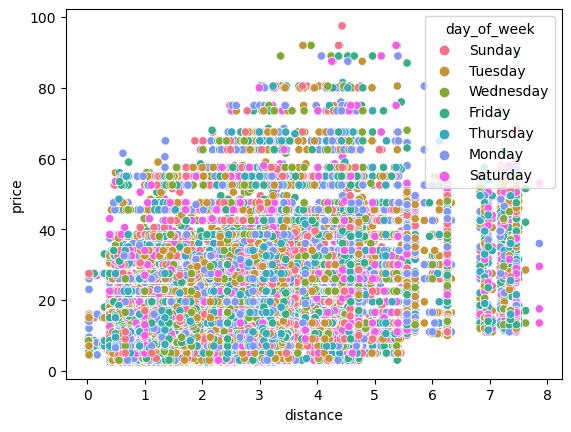

In [63]:
sns.scatterplot(data=ride_weather, x="distance", y="price", hue="day_of_week")

In [64]:
#Function of basic_split finished in hw
def basic_split(X, y, train_size, val_size, test_size, random_state): 
    # Test the inputs
    if sum([train_size, val_size, test_size]) != 1:
        raise ValueError('The input of train_size, val_size, and test_size do not sum up to 1.')
    if type(random_state) != int:
        raise ValueError('The random state is not an integer.')
    X_train, X_other, y_train, y_other = train_test_split(X,y, train_size = train_size,random_state = random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other, train_size = val_size/(val_size + test_size),random_state = random_state)
    print(X.shape)
    print(y.shape)
    print('training set:',X_train.shape, y_train.shape)
    print('validation set:',X_val.shape, y_val.shape) 
    print('test set:',X_test.shape, y_test.shape) 
    # Test the output
    if ((X.shape[0] * train_size) // 1 != X_train.shape[0]) or (X_train.shape[0] != y_train.shape[0]):
        raise ValueError('training set is not correct.')
    elif (round(X.shape[0] * val_size) != X_val.shape[0]) or (X_val.shape[0] != y_val.shape[0]):
        raise ValueError('validation set is not correct.')
    elif (X.shape[0] - X_train.shape[0] - X_val.shape[0] != X_test.shape[0]) or (X_test.shape[0] != y_test.shape[0]):
        raise ValueError('test set is not correct.')
        
    return X_train, y_train, X_val, y_val, X_test, y_test

In [65]:
#Do basic splitting on the dataset
y = ride_weather['price']
X = ride_weather.loc[:, ride_weather.columns != 'price']
X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X, y, 0.6, 0.2, 0.2, 42) 
print(X_train.head())
print(X_val.head())
print(X_test.head())

(637976, 15)
(637976,)
training set: (382785, 15) (382785,)
validation set: (127595, 15) (127595,)
test set: (127596, 15) (127596,)
        distance cab_type        destination            source  \
16405       2.38     Lyft        Beacon Hill            Fenway   
415946      2.15     Lyft           Back Bay     South Station   
409496      1.74     Lyft   Haymarket Square  Theatre District   
1707        0.52     Lyft      North Station  Haymarket Square   
46120       2.80     Uber  Boston University          West End   

        surge_multiplier      name       Date  Hour_of_day     temp   clouds  \
16405                1.0    Shared 2018-12-15            5  44.4800  1.00000   
415946               1.0        XL 2018-12-17           10  35.6900  1.00000   
409496               1.0    Shared 2018-11-26           19  45.7400  0.94000   
1707                 1.0        XL 2018-11-27            0  43.8825  0.98125   
46120                1.0  Standard 2018-12-02            0  35.6300  0.

In [66]:
#Data preprocessing
ordinal_ftrs = ['name', 'surge_multiplier', 'Hour_of_day', 'day_of_week'] 
ordinal_cats = [['Shared','Standard','XL','Lux/Black','Lux Black','Lux/Black XL'], [1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0], \
                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], \
                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
onehot_ftrs = ['cab_type','destination','source']
minmax_ftrs = ['temp', 'pressure', 'humidity', 'wind']
std_ftrs = ['distance', 'clouds', 'rain']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

/Users/winniezhang/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(382785, 15)
(382785, 37)
[[ 0.          0.          5.         ...  0.16766618  1.05732873
          nan]
 [ 2.          0.         10.         ... -0.03453082  1.05732873
  -0.53492522]
 [ 0.          0.         19.         ... -0.39496896  0.86523867
          nan]
 ...
 [ 1.          0.          2.         ... -0.94881292 -0.70807037
  -0.55950443]
 [ 0.          0.         17.         ... -1.35320693 -0.44737672
          nan]
 [ 2.          2.          4.         ...  0.13250148 -1.96808968
          nan]]
